# Name : Sonu Kumar Pal
# Task 6 : Perform Exploratory Data Analysis on Sample SuperStore Data
# Problem Statement : Find out the weak areas where we work to make more profit

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Datasets

In [2]:
ss = pd.read_csv('SampleSuperstore.csv')
ss.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
ss.shape

(9994, 13)

In [4]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
ss.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Visualizing correlation matrix

In [6]:
corr_mat = ss.corr()

In [7]:
corr_mat

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [8]:
plt.rcParams['figure.figsize'] = (15,6)

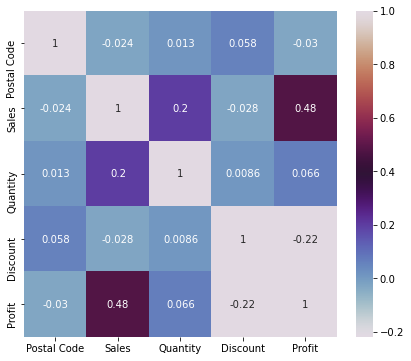

In [9]:
plt.figure(figsize=(7,6))
sns.heatmap(corr_mat, cmap='twilight', annot=True)

In [10]:
ss['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

## Superstore Category Visualization

Text(0.5, 1.0, 'SuperStore Categories')

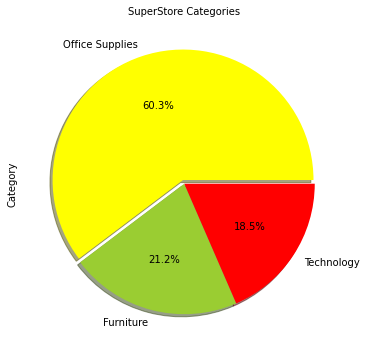

In [11]:
plt.figure(figsize=(15,6))
cat = ss['Category'].value_counts()

cmap = plt.get_cmap('Spectral')
colors = ["yellow", "yellowgreen", "red"]
cat.plot.pie(autopct="%1.1f%%", shadow=True, colors=colors, explode=(0.03,0,0))
plt.title("SuperStore Categories", fontsize=10)

## Visualizing Sub-Category

In [12]:
ss['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

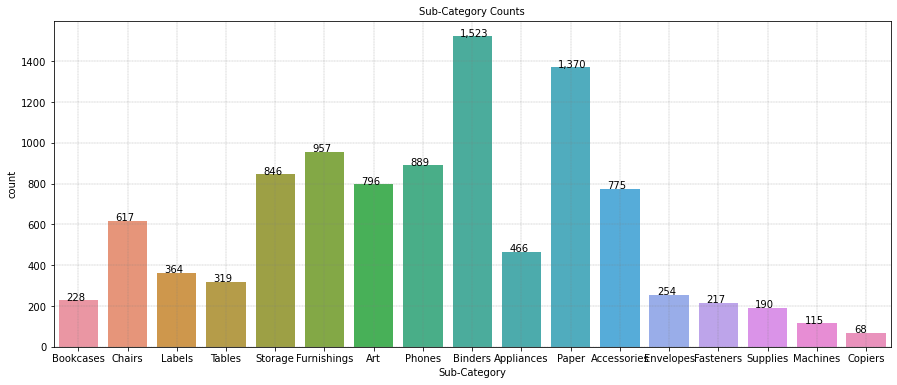

In [13]:
fig = plt.figure(figsize=(15,6))
axes = fig.add_subplot(111)
s = sns.countplot('Sub-Category', data = ss)
for s in axes.patches:
    axes.annotate('{:,.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.title("Sub-Category Counts", fontsize=10)
plt.show()

Text(0.5, 1.0, 'Superstore sub category products')

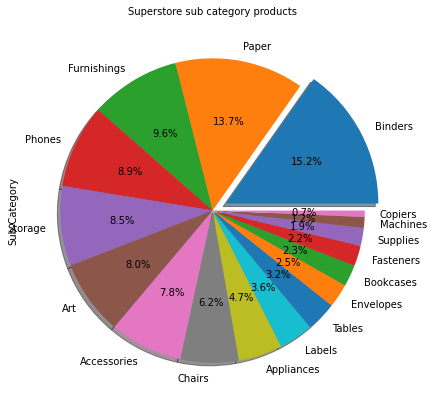

In [14]:
plt.figure(figsize=(15,7))
sub_cat = ss['Sub-Category'].value_counts()
theme = plt.get_cmap('hsv')
sub_cat.plot.pie(autopct="%1.1f%%", shadow=True, explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0))
plt.title("Superstore sub category products", fontsize=10)

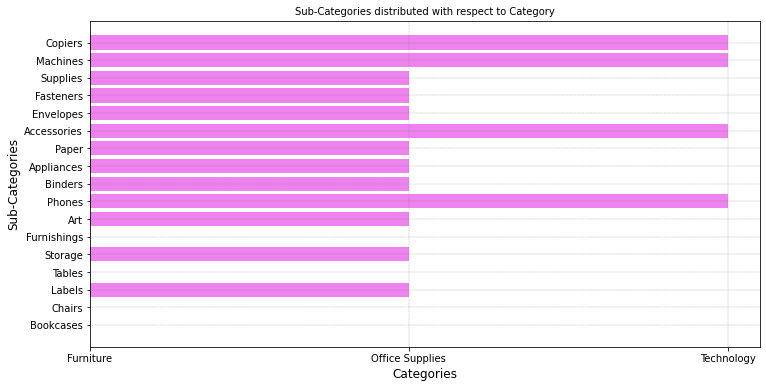

In [15]:
plt.figure(figsize=(12,6))
plt.barh('Sub-Category', 'Category', data=ss, color='violet')
plt.title('Sub-Categories distributed with respect to Category', fontsize=10)  
plt.xlabel('Categories', fontsize=12)  
plt.ylabel('Sub-Categories', fontsize=12)  
plt.grid(color='gray', linestyle='--', linewidth=0.3)

## Visualize the total sales and profit by sub-category

<ipython-input-16-55631cee6854>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sale_profit_sum = ss.groupby('Sub-Category')['Sales', 'Profit'].agg(['sum'])


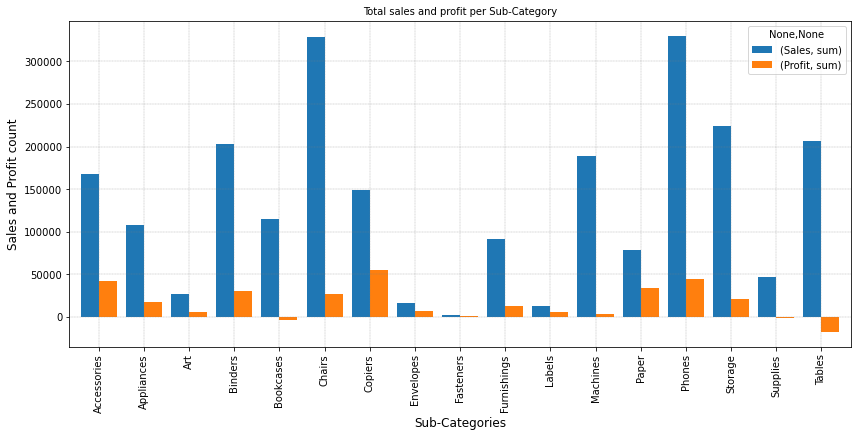

In [16]:
sale_profit_sum = ss.groupby('Sub-Category')['Sales', 'Profit'].agg(['sum'])
sale_profit_sum.plot.bar(width=0.8, figsize=(14,6))
plt.title('Total sales and profit per Sub-Category', fontsize=10)  
plt.xlabel('Sub-Categories', fontsize=12)  
plt.ylabel('Sales and Profit count', fontsize=12)  
plt.grid(color='gray', linestyle='--', linewidth=0.3)

## Visualizing the how much products distributed regionwise

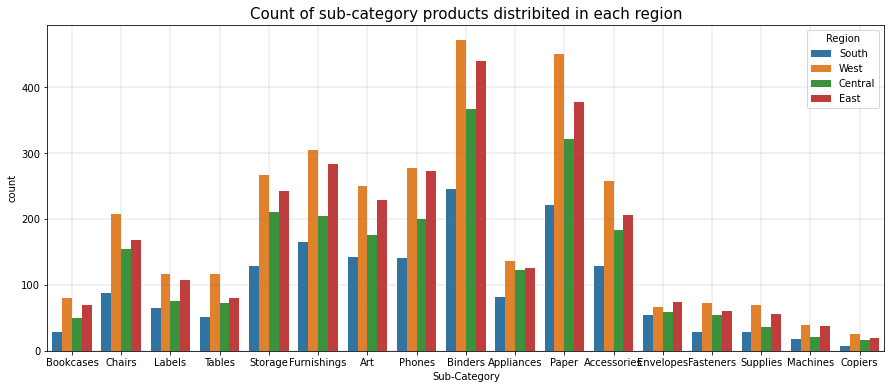

In [17]:
sns.countplot(data=ss, x="Sub-Category", hue='Region')
plt.title('Count of sub-category products distribited in each region', fontsize=15)
plt.grid(color='gray', linestyle='--', linewidth=0.3)

## Finding Cost

In [18]:
# Adding new column 'Cost' in the existing dataset
ss['Cost'] = ss['Sales'] - ss['Profit']
print(ss.head())

        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit       Cost  
0      0.00   41.9136   220.0464  
1      0.00  219.5820 

## Cost Visualization

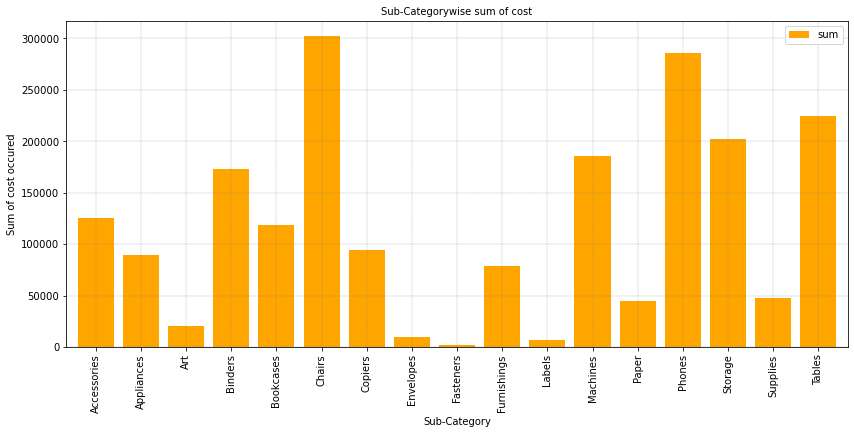

In [20]:
cost_occured = ss.groupby('Sub-Category')['Cost'].agg(['sum'])
cost_occured.plot.bar(width=0.8, figsize=(14,6), color='orange')
plt.title('Sub-Categorywise sum of cost', fontsize=10)
plt.ylabel("Sum of cost occured")
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

## Visualization of total sales by sub-category

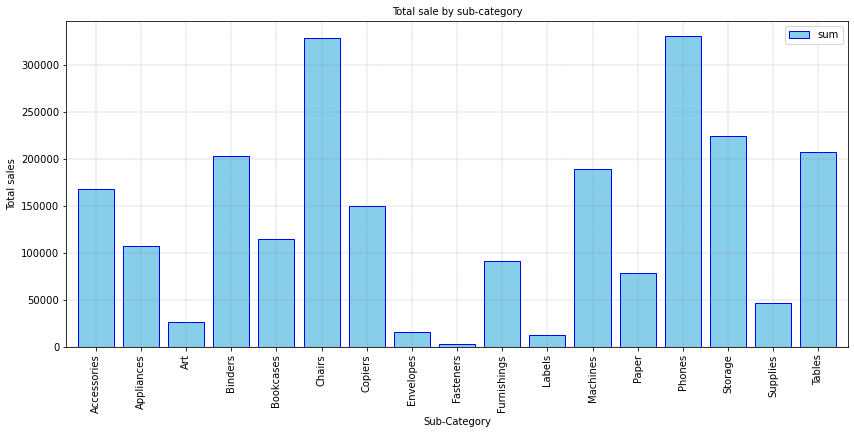

In [21]:
sub_cat_sales = ss.groupby('Sub-Category')['Sales'].agg(['sum'])
sub_cat_sales.plot.bar(width=0.8, figsize=(14,6), color='skyblue', edgecolor='blue')
plt.title('Total sale by sub-category', fontsize=10)
plt.ylabel("Total sales")
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

## Finding profit %

In [27]:
ss['Profit %'] = (ss['Profit']/ss['Cost'])*100
#Profit percentage of first 5 product names
ss.iloc[[0,1,2,3,4],[8,14]]

,Sub-Category,Profit %
0,Bookcases,19.047619
1,Chairs,42.857143
2,Labels,88.679245
3,Tables,-28.571429
4,Storage,12.676056


## Identifying which sub-category makes more profit

In [28]:
# products with high profit percent age
ss.sort_values(['Profit %', 'Sub-Category'], ascending=False).groupby('Profit %').head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
1696,Second Class,Home Office,United States,Bayonne,New Jersey,7002,East,Technology,Phones,104.980,2,0.0,52.4900,52.4900,100.000000
2592,Second Class,Corporate,United States,Summerville,South Carolina,29483,South,Technology,Phones,79.100,2,0.0,39.5500,39.5500,100.000000
6338,Standard Class,Corporate,United States,New York City,New York,10035,East,Technology,Phones,87.800,4,0.0,43.9000,43.9000,100.000000
246,Second Class,Home Office,United States,Lakeville,Minnesota,55044,Central,Office Supplies,Paper,47.880,6,0.0,23.9400,23.9400,100.000000
381,First Class,Corporate,United States,San Francisco,California,94109,West,Office Supplies,Paper,50.960,7,0.0,25.4800,25.4800,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,Standard Class,Corporate,United States,Austin,Texas,78745,Central,Office Supplies,Appliances,48.784,4,0.8,-131.7168,180.5008,-72.972973
8766,Standard Class,Corporate,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,24.588,3,0.8,-67.6170,92.2050,-73.333333
9164,Standard Class,Consumer,United States,Chicago,Illinois,60610,Central,Office Supplies,Appliances,143.128,2,0.8,-393.6020,536.7300,-73.333333
261,Standard Class,Corporate,United States,Pasadena,Texas,77506,Central,Office Supplies,Appliances,1.624,2,0.8,-4.4660,6.0900,-73.333333


## Count of Segmentation 

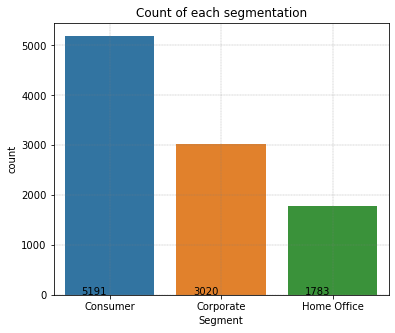

In [29]:
fig = plt.figure(figsize=(6,5))
axes = fig.add_subplot(111)
s = sns.countplot('Segment', data=ss)
for s in axes.patches:
    axes.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_x()+1))
plt.title('Count of each segmentation')
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.show()

## Calculating profit gained in each sub-category by segmentwise

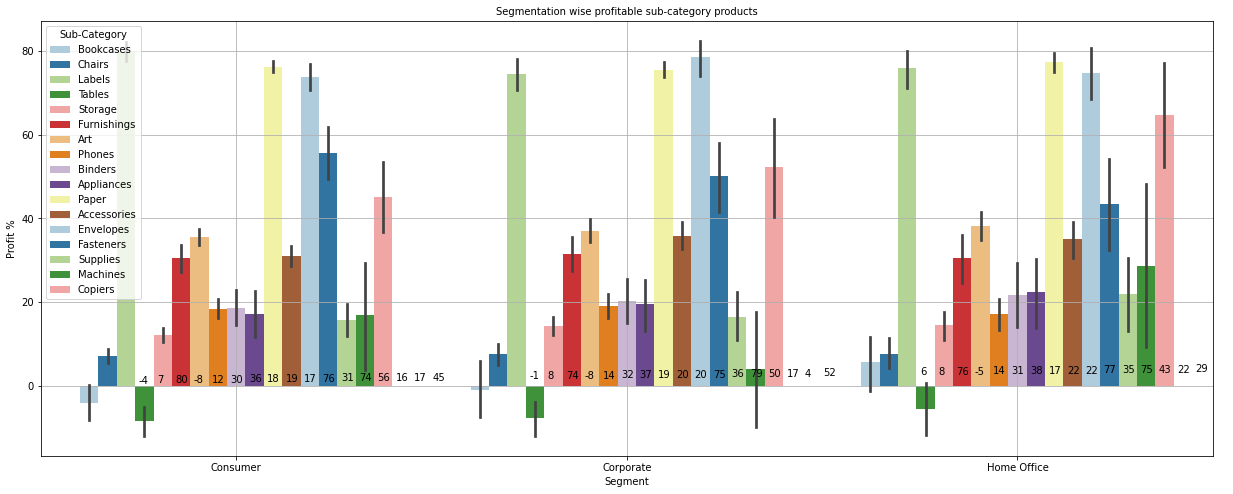

In [30]:
fig = plt.figure(figsize=(21,8))
ax = fig.add_subplot(111)
sns.barplot('Segment', 'Profit %', hue='Sub-Category', palette='Paired', data=ss)
for o in ax.patches:
    ax.annotate('{:.0f}'.format(o.get_height()), (o.get_x()+0.15, o.get_x()+1))
plt.title('Segmentation wise profitable sub-category products', fontsize=10)
plt.grid()
plt.show()